In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from tqdm import tnrange

In [3]:
df = pd.read_csv("Real_Complete_Processed_Data.csv")

In [3]:
df.head()

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Severity,main_Accident,Secondary_Accident,severity_ave
0,A-2478859,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,3,{'A-2478859': 1},0,NaN
1,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,3,{'A-1': 1},1,2.0
2,A-2478860,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,2,{'A-2478860': 1},0,NaN
3,A-2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,2,{'A-2': 1},0,NaN
4,A-2478861,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,2,{'A-2478861': 1},0,NaN


In [4]:
df["severity_ave"].fillna(0, inplace = True)

In [5]:
df.head()

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Severity,main_Accident,Secondary_Accident,severity_ave
0,A-2478859,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,3,{'A-2478859': 1},0,0.0
1,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,3,{'A-1': 1},1,2.0
2,A-2478860,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,2,{'A-2478860': 1},0,0.0
3,A-2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,2,{'A-2': 1},0,0.0
4,A-2478861,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,2,{'A-2478861': 1},0,0.0


In [12]:
df["Secondary_Accident"].value_counts()

0      3348392
1       143247
2        16022
3         3207
4         1289
5          475
6          280
8          175
7          162
9           52
10          51
11          36
12          33
13          28
14          17
15          14
16          12
20          12
17          10
18           8
33           8
31           8
28           7
26           7
22           6
19           5
38           5
21           5
96           4
32           4
29           4
23           3
24           3
27           3
25           2
77           2
30           2
106          1
115          1
99           1
98           1
97           1
92           1
84           1
46           1
75           1
65           1
62           1
59           1
41           1
40           1
37           1
124          1
126          1
Name: Secondary_Accident, dtype: int64

전처리를 통해 다음 세 가지 Feature를 추가:



색상: 심각도

크기: 2차사고 빈도 수

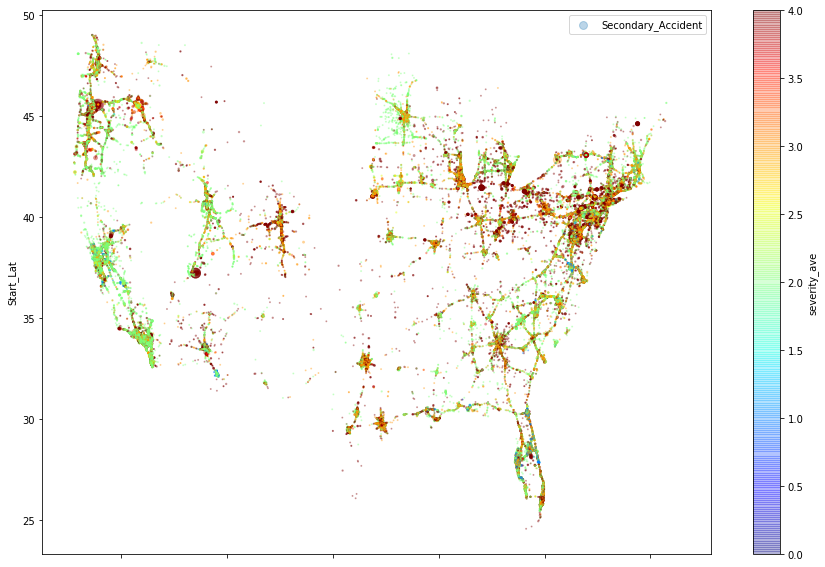

In [8]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["Secondary_Accident"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Secondary_Accident", figsize = (15, 10))

In [9]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df["Secondary_Accident_Scale"] = std_scaler.fit_transform(df[["Secondary_Accident"]])

사고수 Scale해서 같은 Plot

/Users/HongSukhyun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


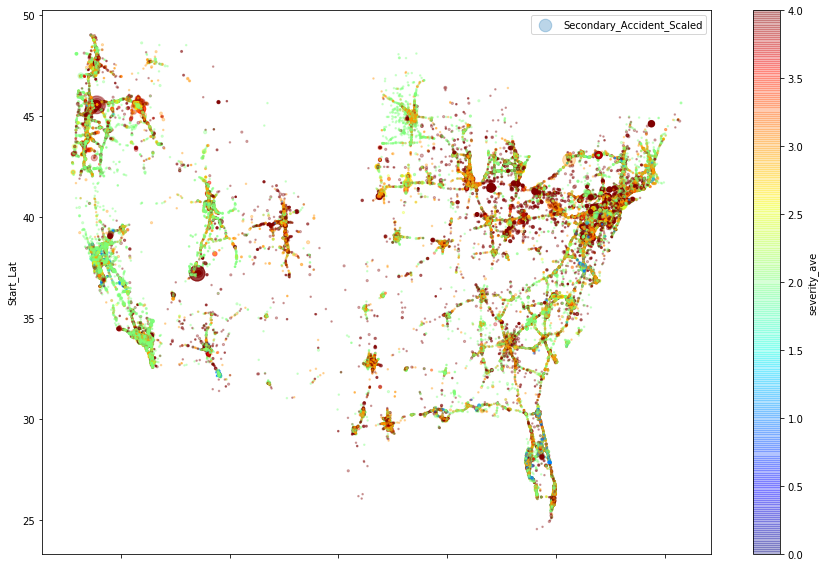

In [10]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["Secondary_Accident_Scale"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Secondary_Accident_Scaled", figsize = (15, 10))

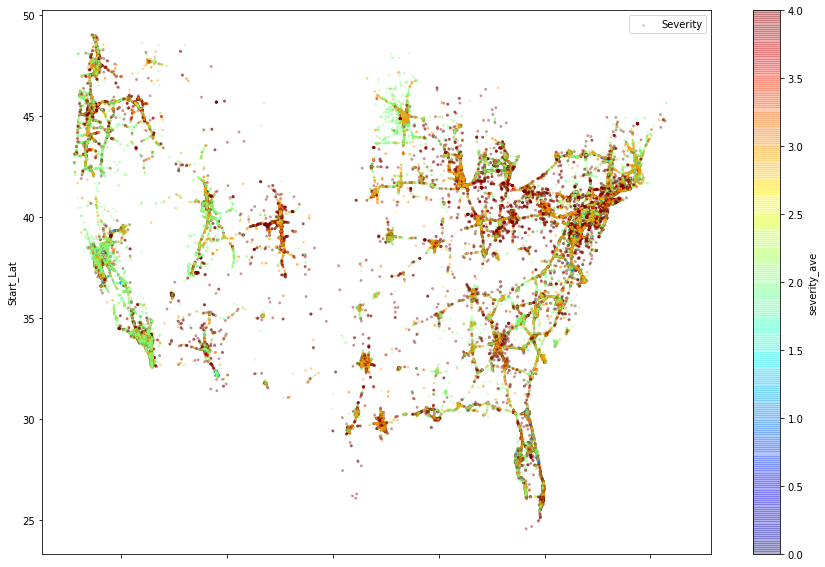

In [11]:
df.plot(kind = "scatter", x = "Start_Lng", y = "Start_Lat", alpha = 0.3, s = (df["severity_ave"]), c = "severity_ave", cmap =  plt.get_cmap("jet"), label = "Severity", figsize = (15, 10))

In [16]:
original = pd.read_csv("US_Accidents_June20.csv")

In [14]:
df.columns

Index(['ID', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Severity', 'main_Accident', 'Secondary_Accident',
       'severity_ave', 'Secondary_Accident_Scale'],
      dtype='object')

Network

In [80]:
import ast
accidents = {}
for i in tnrange(0, df.shape[0]):
    a = df.iloc[i]
    accidents[a["ID"]] = []
    try:
        main = list(ast.literal_eval(a["main_Accident"]).keys())[0]
    except:
        main ="main"
    if main!=a["ID"]:
        accidents[a["ID"]].append(main)
    else: 
        accidents[a["ID"]].append("main")

/Users/HongSukhyun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
df.head()

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Severity,main_Accident,Secondary_Accident,severity_ave,Secondary_Accident_Scale
0,A-2478859,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,3,{'A-2478859': 1},0,0.0,-0.145533
1,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,3,{'A-1': 1},1,2.0,2.362577
2,A-2478860,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,2,{'A-2478860': 1},0,0.0,-0.145533
3,A-2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,2,{'A-2': 1},0,0.0,-0.145533
4,A-2478861,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,2,{'A-2478861': 1},0,0.0,-0.145533


In [95]:
accidents_filter = {}

In [98]:
accidents

{'A-2478859': ['main'],
 'A-1': ['main'],
 'A-2478860': ['main'],
 'A-2': ['main'],
 'A-2478861': ['main'],
 'A-2478862': ['main'],
 'A-3': ['main'],
 'A-2478863': ['main'],
 'A-4': ['main'],
 'A-5': ['main'],
 'A-6': ['main'],
 'A-2478864': ['main'],
 'A-7': ['main'],
 'A-8': ['main'],
 'A-9': ['main'],
 'A-10': ['A-6'],
 'A-11': ['main'],
 'A-2478867': ['main'],
 'A-2478865': ['main'],
 'A-2478866': ['main'],
 'A-12': ['main'],
 'A-13': ['main'],
 'A-14': ['main'],
 'A-15': ['main'],
 'A-16': ['main'],
 'A-17': ['main'],
 'A-18': ['main'],
 'A-19': ['main'],
 'A-20': ['main'],
 'A-21': ['main'],
 'A-22': ['main'],
 'A-2478868': ['main'],
 'A-23': ['main'],
 'A-24': ['main'],
 'A-25': ['main'],
 'A-26': ['main'],
 'A-27': ['main'],
 'A-2478869': ['main'],
 'A-28': ['main'],
 'A-29': ['main'],
 'A-2478870': ['main'],
 'A-30': ['main'],
 'A-2478871': ['main'],
 'A-31': ['main'],
 'A-2478872': ['main'],
 'A-2478873': ['main'],
 'A-2478874': ['main'],
 'A-32': ['main'],
 'A-2478875': ['ma